<a href="https://colab.research.google.com/github/eman-kom/tensorflow-fundamentals/blob/main/09_SkimLit_Milestone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
NLP model to make reading medical abstracts easier

## Paper referenced:
* [https://arxiv.org/abs/1710.06071](https://arxiv.org/abs/1710.06071)
* [https://arxiv.org/abs/1612.05251](https://arxiv.org/abs/1612.05251)

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5fc01a31-0960-34c3-7a99-bb08926dca9e)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import calculate_results

--2022-07-24 12:01:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-24 12:01:55 (82.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



# Getting & Pre-Processing Data
Source: [https://github.com/Franck-Dernoncourt/pubmed-rct](https://github.com/Franck-Dernoncourt/pubmed-rct)

In [3]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [4]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [5]:
!head pubmed-rct/PubMed_20k_RCT/train.txt

###24293578
OBJECTIVE	To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( 0-100 mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and 6-min walk distance ( 6MWD ) .
METHODS	Serum levels of interleukin 1 ( IL-1 ) , IL-6 , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein

In [6]:
!head pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt

###24293578
OBJECTIVE	To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .
METHODS	A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .
METHODS	Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .
METHODS	Pain was assessed using the visual analog pain scale ( @-@ mm ) .
METHODS	Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .
METHODS	Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP 

In [7]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [8]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [9]:
train_lines = get_lines(data_dir+"/train.txt")
train_lines[:27]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [10]:
for i in enumerate(train_lines[:10]):
  print(i)

(0, '###24293578\n')
(1, 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n')
(2, 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n')
(3, 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n')
(4, 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n')
(5, 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n')
(6, 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis fa

In [11]:
def preprocess_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstract_lines = ""
  abstract_samples = []
  
 
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()

     
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target, text = abstract_line.split("\t")
        line_data["target"] = target
        line_data["text"] = text.lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    
    else:
      abstract_lines += line
  
  return abstract_samples

In [12]:
%%time
train_samples = preprocess_with_line_numbers(data_dir + "train.txt")
val_samples = preprocess_with_line_numbers(data_dir + "dev.txt")
test_samples = preprocess_with_line_numbers(data_dir + "test.txt")
print(len(train_samples), len(val_samples), len(test_samples))

180040 30212 30135
CPU times: user 688 ms, sys: 99.4 ms, total: 787 ms
Wall time: 1.07 s


# Visualising Dataset

In [13]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [14]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

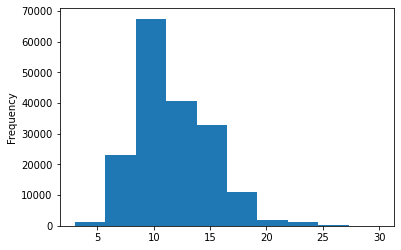

In [15]:
train_df.total_lines.plot.hist();

In [16]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()
len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

# Encoding labels

In [17]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)

train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
# Encode Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [19]:
classes = label_encoder.classes_
num_classes = len(classes)
classes

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

# Model 0: Baseline Model, TF-IDF Multinomial Naive Bayes Classifier

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(
    train_sentences,
    train_labels_encoded
)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [21]:
model_0.score(val_sentences, val_labels_encoded)

0.7218323844829869

In [22]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds

array([4, 1, 3, ..., 4, 4, 1])

In [23]:
model_0_results = calculate_results(val_labels_encoded, baseline_preds)
model_0_results

{'accuracy': 72.1832384482987,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# Preparing text for deep learning

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [25]:
sent_lengths = [len(sentence.split()) for sentence in train_sentences]
avg_sent_lengths = np.mean(sent_lengths)
avg_sent_lengths

26.338269273494777

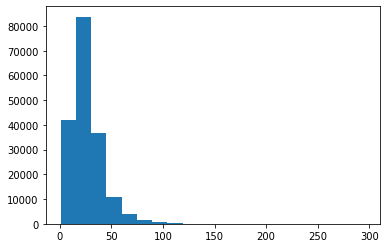

In [26]:
import matplotlib.pyplot as plt
plt.hist(sent_lengths, bins=20);

In [27]:
output_seq_len = int(np.percentile(sent_lengths, 95))
output_seq_len

55

In [28]:
max(sent_lengths)

296

## Vectorizing on training sentences

In [29]:
MAX_TOKENS = 68000

In [30]:
from tensorflow.keras.layers import TextVectorization

In [31]:
vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS,
    output_sequence_length=output_seq_len
)

In [32]:
vectorizer.adapt(train_sentences)

In [33]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text:\n{len(target_sentence.split())}")
print(f"\nVectorized Text:\n{vectorizer([target_sentence])}")

Text:
neonates at risk for early-onset sepsis are started on antibiotics empirically .

Length of text:
12

Vectorized Text:
[[2119   15   73   11 8720 1762   58 1973   18 1766 8094    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]


In [34]:
rct_20k_vocab = vectorizer.get_vocabulary()
print(f"Word Count: {len(rct_20k_vocab)}")
print(f"Most common words: {rct_20k_vocab[:5]}")
print(f"Least common words: {rct_20k_vocab[-5:]}")

Word Count: 64841
Most common words: ['', '[UNK]', 'the', 'and', 'of']
Least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [35]:
vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 68000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

## Creating token Embedding

In [36]:
from tensorflow.keras.layers import Embedding 

In [37]:
token_embedding = Embedding(
    input_dim=len(rct_20k_vocab),
    output_dim=128,
    mask_zero=True,
    name="token_embedding"
)

In [38]:
print(f"Normal:\n{target_sentence}")
print(f"\nVectorized:\n{vectorizer([target_sentence])}")
print(f"\nVectorized shape: {vectorizer([target_sentence]).shape}")
print(f"\nEmbedding:\n{token_embedding(vectorizer([target_sentence]))}")
print(f"\nEmbedding shape: {token_embedding(vectorizer([target_sentence])).shape}")

Normal:
neonates at risk for early-onset sepsis are started on antibiotics empirically .

Vectorized:
[[2119   15   73   11 8720 1762   58 1973   18 1766 8094    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]]

Vectorized shape: (1, 55)

Embedding:
[[[-0.0354349  -0.02024483  0.02015622 ... -0.00641908 -0.04918242
    0.03416793]
  [ 0.02742318 -0.03554488 -0.01075993 ...  0.01333766  0.03891313
    0.04172127]
  [-0.02687081  0.01904145  0.0457606  ...  0.01516105 -0.01587028
    0.04162511]
  ...
  [ 0.02778343 -0.04485226 -0.00216738 ... -0.03924106  0.02892626
    0.03740165]
  [ 0.02778343 -0.04485226 -0.00216738 ... -0.03924106  0.02892626
    0.03740165]
  [ 0.02778343 -0.04485226 -0.00216738 ... -0.03924106  0.02892626
    0.03740165]]]

Embedding shape: (1, 55, 128)


# Creating Datasets

In [39]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [40]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

# Model 1: Conv1D with token embeddings

In [41]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = vectorizer(inputs)
token_embeddings = token_embedding(text_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [42]:
history_model_1 = model_1.fit(
    train_dataset,
    steps_per_epoch=int(0.1*len(train_dataset)),
    epochs=3,
    validation_data=valid_dataset,
    validation_steps=int(0.1*len(valid_dataset))
)

Epoch 1/3
562/562 [==============================] - 16s 9ms/step - loss: 0.9200 - accuracy: 0.6373 - val_loss: 0.6869 - val_accuracy: 0.7367
Epoch 2/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6540 - accuracy: 0.7600 - val_loss: 0.6316 - val_accuracy: 0.7749
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6137 - accuracy: 0.7774 - val_loss: 0.5956 - val_accuracy: 0.7856


In [43]:
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5941 - accuracy: 0.7873


[0.5940772294998169, 0.7873361706733704]

In [44]:
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs, model_1_pred_probs.shape

(array([[4.8269963e-01, 1.2819645e-01, 4.2951532e-02, 3.2789534e-01,
         1.8257082e-02],
        [3.7608781e-01, 3.4983277e-01, 1.2589197e-02, 2.4752718e-01,
         1.3962978e-02],
        [1.4327878e-01, 5.3504896e-03, 2.5102601e-03, 8.4880900e-01,
         5.1459741e-05],
        ...,
        [8.2801689e-06, 6.9290731e-04, 7.4910210e-04, 4.4775716e-06,
         9.9854529e-01],
        [4.9256243e-02, 4.9623621e-01, 7.5584181e-02, 5.1393796e-02,
         3.2752964e-01],
        [1.8342100e-01, 6.7641205e-01, 4.6478800e-02, 4.6781916e-02,
         4.6906292e-02]], dtype=float32), (30212, 5))

In [45]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_results = calculate_results(val_labels_encoded, model_1_preds)
model_1_results, model_0_results

({'accuracy': 78.73361578180855,
  'f1': 0.7849124127762285,
  'precision': 0.784290296575759,
  'recall': 0.7873361578180855},
 {'accuracy': 72.1832384482987,
  'f1': 0.6989250353450294,
  'precision': 0.7186466952323352,
  'recall': 0.7218323844829869})

# Model 2 Feature Extraction with pretrained token embeddings

In [46]:
import tensorflow_hub as hub

tf_hub_embedding_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    trainable=False,
    name="universal_sentence_encoder"
)

In [47]:
random_train_sentence = random.choice(train_sentences)
print(random_train_sentence)
USE_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(USE_embedded_sentence[0][:10])
print(len(USE_embedded_sentence[0]))

higher mean median nerve sensory nerve conduction velocity ( sncv ) was found in patients with early deterioration compared to patients with non-early deterioration ( @ and respectively @ m/s , p = @ ) .
tf.Tensor(
[ 0.02926613  0.03306697 -0.0145111  -0.01142088  0.02898634  0.02081925
 -0.00822709 -0.05463023 -0.0287807  -0.03731383], shape=(10,), dtype=float32)
512


In [48]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embeddings = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embeddings)
outputs = layers.Dense(5, activation="softmax")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_USE_feature_extractor")

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [49]:
history_model_2 = model_2.fit(
    train_dataset,
    epochs=3,
    steps_per_epoch=int(0.1*len(train_dataset)),
    validation_data=valid_dataset,
    validation_steps=int(0.1*len(valid_dataset))
)

Epoch 1/3
562/562 [==============================] - 11s 13ms/step - loss: 0.9193 - accuracy: 0.6501 - val_loss: 0.7974 - val_accuracy: 0.6882
Epoch 2/3
562/562 [==============================] - 14s 25ms/step - loss: 0.7718 - accuracy: 0.7001 - val_loss: 0.7579 - val_accuracy: 0.7038
Epoch 3/3
562/562 [==============================] - 14s 25ms/step - loss: 0.7570 - accuracy: 0.7110 - val_loss: 0.7439 - val_accuracy: 0.7131


In [50]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 19s 20ms/step - loss: 0.7462 - accuracy: 0.7131


[0.7461990118026733, 0.7130941152572632]

In [51]:
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

array([[0.4203518 , 0.38332567, 0.00241852, 0.18609117, 0.00781286],
       [0.3336339 , 0.50601304, 0.00380061, 0.1544874 , 0.00206508],
       [0.22245882, 0.14305173, 0.02122932, 0.57157665, 0.04168348],
       ...,
       [0.00177539, 0.00639202, 0.06627788, 0.00108947, 0.92446524],
       [0.00426921, 0.04860497, 0.20121415, 0.00159573, 0.7443159 ],
       [0.19522187, 0.27985254, 0.45791695, 0.00729481, 0.05971378]],
      dtype=float32)

In [52]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [53]:
model_2_results = calculate_results(val_labels_encoded, model_2_preds)
model_2_results

{'accuracy': 71.30941347808817,
 'f1': 0.7102436239280251,
 'precision': 0.7133931484463613,
 'recall': 0.7130941347808818}

In [54]:
model_0_results, model_1_results, model_2_results

({'accuracy': 72.1832384482987,
  'f1': 0.6989250353450294,
  'precision': 0.7186466952323352,
  'recall': 0.7218323844829869},
 {'accuracy': 78.73361578180855,
  'f1': 0.7849124127762285,
  'precision': 0.784290296575759,
  'recall': 0.7873361578180855},
 {'accuracy': 71.30941347808817,
  'f1': 0.7102436239280251,
  'precision': 0.7133931484463613,
  'recall': 0.7130941347808818})

# Model 3: Conv1D with character embeddings

In [55]:
train_chars = [" ".join(list(sentence)) for sentence in train_sentences]
val_chars = [" ".join(list(sentence)) for sentence in val_sentences]
test_chars = [" ".join(list(sentence)) for sentence in test_sentences]

train_chars[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [56]:
output_seq_char_len = int(np.percentile([len(sentence) for sentence in train_sentences], 95))
output_seq_char_len

290

In [57]:
import string

NUM_CHAR_TOKENS = len(string.ascii_lowercase + string.digits + string.punctuation) + 2
char_vectorizer = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length=output_seq_char_len,
    name="char_vectorizer"
)

In [58]:
char_vectorizer.adapt(train_chars)
char_vocab = char_vectorizer.get_vocabulary()

print(f"top 5: {char_vocab[:5]}")
print(f"bot 5: {char_vocab[-5:]}")

top 5: ['', '[UNK]', 'e', 't', 'i']
bot 5: ['k', 'x', 'z', 'q', 'j']


In [59]:
random_chars = random.choice(train_chars)
vectorized_chars = char_vectorizer([random_chars])

print(random_chars)
print(vectorized_chars)
print(len(vectorized_chars[0]))

f i n a l l y   ,   t h e r e   w a s   a   h i g h   f r e q u e n c y   o f   a n t e r i o r   k n e e   p a i n   i n   t h e   i m   g r o u p   .
tf.Tensor(
[[17  4  6  5 12 12 19  3 13  2  8  2 20  5  9  5 13  4 18 13 17  8  2 26
  16  2  6 11 19  7 17  5  6  3  2  8  4  7  8 23  6  2  2 14  5  4  6  4
   6  3 13  2  4 15 18  8  7 16 14  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0 

In [60]:
char_embedding = Embedding(
    len(char_vocab),
    25, # from the paper
    mask_zero=True,
    name="char_embed"
)

In [61]:
print(char_embedding(vectorized_chars))

tf.Tensor(
[[[ 0.02409614  0.00456718  0.03841809 ... -0.03111305 -0.02484667
    0.00658163]
  [ 0.04358908  0.04555592  0.01370658 ... -0.04221057  0.04990706
    0.04086944]
  [ 0.03709999 -0.02523826 -0.02156699 ... -0.01939032 -0.04732262
    0.01344378]
  ...
  [ 0.01082412  0.01403404  0.01736862 ...  0.01812937  0.00899629
    0.0118285 ]
  [ 0.01082412  0.01403404  0.01736862 ...  0.01812937  0.00899629
    0.0118285 ]
  [ 0.01082412  0.01403404  0.01736862 ...  0.01812937  0.00899629
    0.0118285 ]]], shape=(1, 290, 25), dtype=float32)


In [62]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
vectorizer_layer = char_vectorizer(inputs)
embedding_layer = char_embedding(vectorizer_layer)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(embedding_layer)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

model_3 = tf.keras.Model(
    inputs=inputs,
    outputs=outputs,
    name="model_3_conv1d")

model_3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model_3.summary()

Model: "model_3_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 290)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)              

In [63]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [64]:
history_model_3 = model_3.fit(
    train_char_dataset,
    steps_per_epoch=int(0.1*len(train_char_dataset)),
    epochs=3,
    validation_data=val_char_dataset,
    validation_steps=int(0.1*len(val_char_dataset))
)

Epoch 1/3
562/562 [==============================] - 4s 6ms/step - loss: 1.2427 - accuracy: 0.4935 - val_loss: 1.0296 - val_accuracy: 0.5884
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0037 - accuracy: 0.5936 - val_loss: 0.9417 - val_accuracy: 0.6263
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9314 - accuracy: 0.6375 - val_loss: 0.8736 - val_accuracy: 0.6566


In [65]:
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 3s 4ms/step - loss: 0.8917 - accuracy: 0.6533


[0.8916629552841187, 0.6532834768295288]

In [66]:
model_3_preds = tf.argmax(model_3.predict(val_char_dataset), axis=1)
model_3_results = calculate_results(val_labels_encoded, model_3_preds)
model_3_results, model_2_results, model_1_results, model_0_results

({'accuracy': 65.32834635244274,
  'f1': 0.6452253303544309,
  'precision': 0.6493261341608441,
  'recall': 0.6532834635244273},
 {'accuracy': 71.30941347808817,
  'f1': 0.7102436239280251,
  'precision': 0.7133931484463613,
  'recall': 0.7130941347808818},
 {'accuracy': 78.73361578180855,
  'f1': 0.7849124127762285,
  'precision': 0.784290296575759,
  'recall': 0.7873361578180855},
 {'accuracy': 72.1832384482987,
  'f1': 0.6989250353450294,
  'precision': 0.7186466952323352,
  'recall': 0.7218323844829869})

# Model 4: Hybrid Model with token and character embedding

In [67]:
# token model
token_inputs = layers.Input(shape=[], dtype=tf.string)
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(token_inputs, token_outputs)

# char model
char_inputs = layers.Input(shape=(1,), dtype=tf.string)
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embedding(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

# concatenate models
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output, char_model.output])

# create output layer
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(128, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# build model
model_4 = tf.keras.Model(
    inputs=[token_model.input, char_model.input],
    outputs=output_layer,
    name="model_4_hybrid_model"
)

model_4.summary()

Model: "model_4_hybrid_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['input_5[0][0]']                
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['input_4[0][0

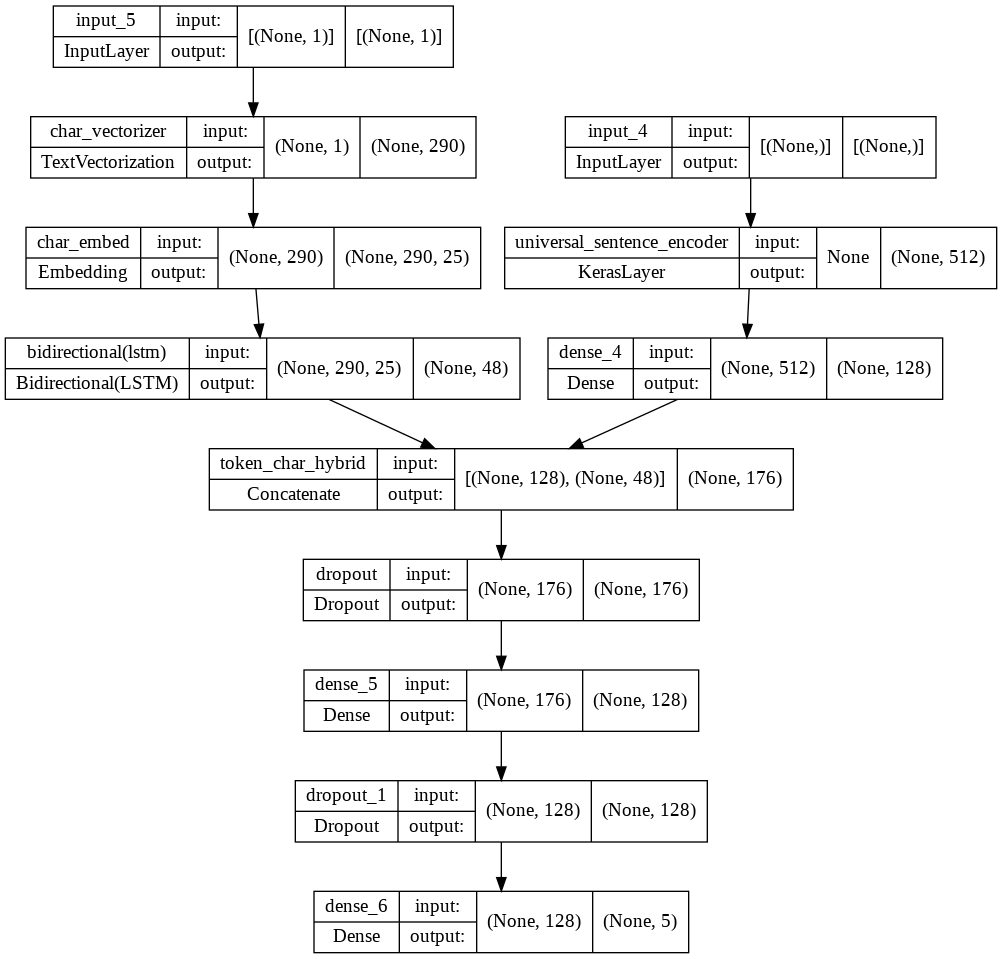

In [68]:
from keras.utils.vis_utils import plot_model
plot_model(model_4, show_shapes=True)

In [69]:
model_4.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

## Creating Multimodal datasets

In [70]:
from tensorflow.data import Dataset

In [74]:
train_char_token_dataset = Dataset.zip((
    Dataset.from_tensor_slices((train_sentences, train_chars)), # data
    Dataset.from_tensor_slices(train_labels_one_hot)            # labels
)).batch(32).prefetch(tf.data.AUTOTUNE)

In [75]:
val_char_token_dataset = Dataset.zip((
    Dataset.from_tensor_slices((val_sentences, val_chars)), # data
    Dataset.from_tensor_slices(val_labels_one_hot)          # labels
)).batch(32).prefetch(tf.data.AUTOTUNE)

In [76]:
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

## Fitting model to dataset

In [77]:
history_model_4 = model_4.fit(
    train_char_token_dataset,
    steps_per_epoch=int(0.1*len(train_char_token_dataset)),
    epochs=3,
    validation_data=val_char_token_dataset,
    validation_steps=int(0.1*len(val_char_token_dataset)),
)

Epoch 1/3
562/562 [==============================] - 37s 51ms/step - loss: 0.9881 - accuracy: 0.6049 - val_loss: 0.7847 - val_accuracy: 0.6898
Epoch 2/3
562/562 [==============================] - 35s 62ms/step - loss: 0.8017 - accuracy: 0.6887 - val_loss: 0.7132 - val_accuracy: 0.7330
Epoch 3/3
562/562 [==============================] - 36s 65ms/step - loss: 0.7725 - accuracy: 0.7050 - val_loss: 0.6888 - val_accuracy: 0.7397


In [78]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 32s 33ms/step - loss: 0.6951 - accuracy: 0.7328


[0.6950684189796448, 0.7327883243560791]

In [80]:
model_4_results = calculate_results(
    val_labels_encoded,
    tf.argmax(model_4.predict(val_char_token_dataset), axis=1)
)

model_4_results

{'accuracy': 73.2788296041308,
 'f1': 0.7304545329568027,
 'precision': 0.7337725226902736,
 'recall': 0.7327882960413081}